In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
date = pd.read_csv('zapis 2023-2024.csv', delimiter =';', decimal =',')
date.head()


C:\Users\ANALIZY\AppData\Local\Temp\ipykernel_20032\2357694814.py:1: DtypeWarning: Columns (4,5,15,26,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  date = pd.read_csv('zapis 2023-2024.csv', delimiter =';', decimal =',')


,Lp.,Mag.,Nazwa magazynu,Nazwa towaru/usługi,Symbol,Indeks (PLU),Jedn. miary,Kontrahent,Nr dok.,Data wprow.,...,Grupa t.,Kategoria1,Kategoria2,Kategoria3,Kategoria4,Kategoria5,Stan,Bieżąca Ilość na stanie,Ilość na pocz. okresu,Ilość na koniec okresu
0,1,M 6,MAGAZYN GŁÓWNY,..........Przyjedzie,1020347,1020347,NaN,Korekta ze spisu z natury,"Inw: ,godz:",06.01.2023,...,INNE,INNE,NaN,NaN,NaN,NaN,0.0,-201.6,1000.0,-201.6
1,2,M 6,MAGAZYN GŁÓWNY,..........Przyjedzie,1020347,1020347,NaN,"Firma Handlowa ""Dragon"" Sebastian Kozłowski",KK/01215/2024,12.07.2024,...,INNE,INNE,NaN,NaN,NaN,NaN,5.0,-201.6,1000.0,-201.6
2,3,M 6,MAGAZYN GŁÓWNY,..........Przyjedzie,1020347,1020347,NaN,"Firma Handlowa ""Dragon"" Sebastian Kozłowski",FV015639/2024,12.07.2024,...,INNE,INNE,NaN,NaN,NaN,NaN,0.0,-201.6,1000.0,-201.6
3,4,M 6,MAGAZYN GŁÓWNY,..........Przyjedzie,1020347,1020347,NaN,MPT STANRO Sp.z o.o.,FV018317/2024,12.08.2024,...,INNE,INNE,NaN,NaN,NaN,NaN,-6.0,-201.6,1000.0,-201.6
4,5,M 6,MAGAZYN GŁÓWNY,..........Przyjedzie,1020347,1020347,NaN,MPT STANRO Sp.z o.o.,FV019520/2024,26.08.2024,...,INNE,INNE,NaN,NaN,NaN,NaN,-19.0,-201.6,1000.0,-201.6


In [3]:
data1 = date[(date['Grupa t.']=='POMIDORY')]
data1 = data1[(data1['Typ dok']=="F.Sprz.")]
data_analyse = data1[['Grupa t.','Data wprow.','Cena sprzedaży (netto)','Ilość','Ilość przelicz.']]
data2 = data_analyse.groupby('Data wprow.')
data2.head(5)

,Grupa t.,Data wprow.,Cena sprzedaży (netto),Ilość,Ilość przelicz.
116344,POMIDORY,28.06.2024,65.71,-3.0,-15.0
116345,POMIDORY,28.06.2024,65.71,-1.0,-5.0
116346,POMIDORY,28.06.2024,65.71,-2.0,-10.0
116347,POMIDORY,28.06.2024,65.71,-3.0,-15.0
116348,POMIDORY,30.06.2024,57.14,-3.0,-15.0
...,...,...,...,...,...
588055,POMIDORY,09.09.2023,32.00,-1.0,-6.0
588658,POMIDORY,24.02.2024,70.00,-1.0,-6.0
588741,POMIDORY,27.01.2024,95.00,-1.0,-6.0
589290,POMIDORY,03.09.2023,29.00,-3.0,-18.0


In [4]:
daty = data_analyse['Data wprow.'].unique()
#print(daty)
average_day = {}

for i in daty: 
    daily_data = data_analyse[data_analyse['Data wprow.'] == i]
    average = (daily_data['Cena sprzedaży (netto)'] *daily_data['Ilość']).sum() / daily_data['Ilość przelicz.'].sum()
    average_day[i]=abs(average)

cena_ważona  = pd.DataFrame( list(average_day.items()), columns = ["Data","Cena"])
cena_ważona['Data'] = pd.to_datetime(cena_ważona['Data'])
cena_ważona = cena_ważona.sort_values(by = 'Data')
cena_ważona

C:\Users\ANALIZY\AppData\Local\Temp\ipykernel_20032\3479033605.py:11: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cena_ważona['Data'] = pd.to_datetime(cena_ważona['Data'])


,Data,Cena
524,2023-01-02,6.817712
507,2023-01-03,7.877944
525,2023-01-04,12.511917
526,2023-01-05,9.695742
634,2023-01-07,8.959264
...,...,...
101,2024-11-08,9.568884
422,2024-11-09,10.820077
102,2024-11-11,10.039382
280,2024-11-12,11.874887


In [5]:
#SMA
cena_ważona['SMA_10'] = cena_ważona['Cena'].rolling(window = 14 ).mean()

#EMA
cena_ważona['EMA_10'] = cena_ważona['Cena'].ewm(span = 14 ).mean()

#regresja 
kopia = cena_ważona.copy()
kopia['Data'] = kopia['Data'].astype('int64')
model_reg = LinearRegression()

X=kopia[['Data']]
y1= kopia['Cena']
model_reg.fit(X,y1)
r_s = model_reg.score(X,y1)
print(r_s)

0.09574749288979645


524   2023-01-02
507   2023-01-03
525   2023-01-04
526   2023-01-05
634   2023-01-07
         ...    
101   2024-11-08
422   2024-11-09
102   2024-11-11
280   2024-11-12
103   2024-11-13
Name: Data, Length: 670, dtype: datetime64[ns]


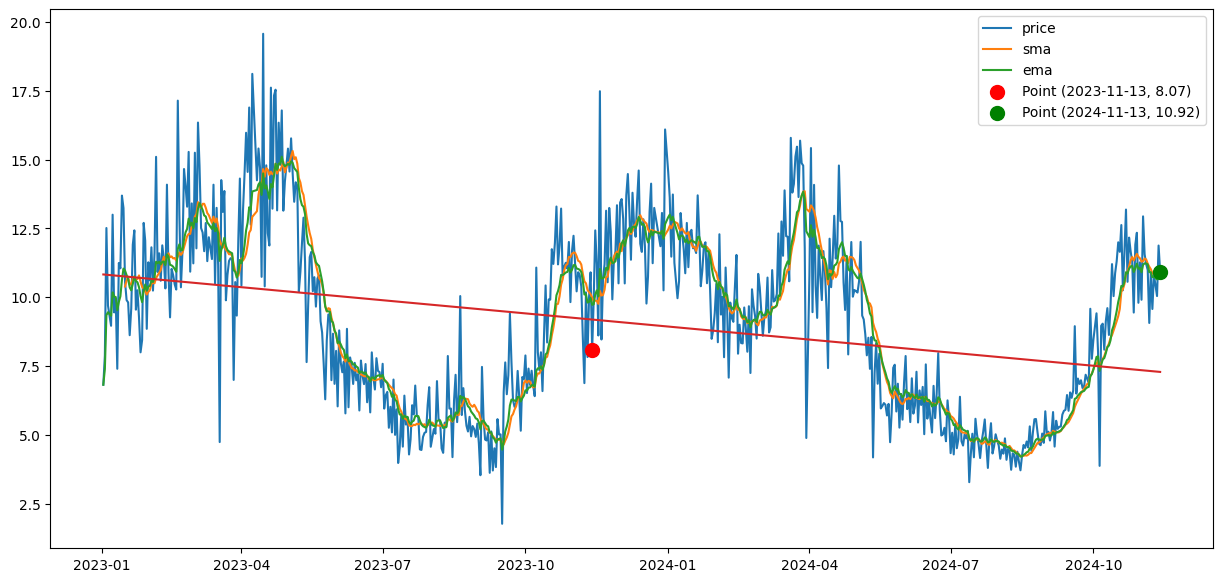

In [6]:
fig, ax = plt.subplots(figsize=(15,7))

x=cena_ważona['Data']
y= cena_ważona['Cena']
sma= cena_ważona['SMA_10']
ema = cena_ważona['EMA_10']
print(x)

select_day='2023-11-13'
select_day_date =pd.to_datetime(select_day)
a =cena_ważona.loc[cena_ważona['Data']==select_day,'Cena']
b=a.iloc[0]
select_today= '2024-11-13'
select_today_date =pd.to_datetime(select_today)
a1 =cena_ważona.loc[cena_ważona['Data']==select_today,'Cena']
b1=a1.iloc[0]

ax.plot(x,y,label='price')
ax.plot(x,sma,label='sma')
ax.plot(x,ema,label='ema')
ax.plot(x,model_reg.predict(X))
#plt.gca().set_xlim(x[0],x[len(x)-1])
plt.scatter(select_day_date,b,color= 'r',s=100,label=f'Point ({select_day}, {b:.2f})', zorder=5)
plt.scatter(select_today_date,b1,color= 'g',s=100,label=f'Point ({select_today}, {b1:.2f})', zorder=5)
plt.legend()
plt.show()

In [11]:
"""import plotly.graph_objects as go
print(cena_ważona['Data'])
fig=go.Figure(data=[go.Candlestick(x=cena_ważona['Data'],open= y)])
fig.show()"""

"import plotly.graph_objects as go\nprint(cena_ważona['Data'])\nfig=go.Figure(data=[go.Candlestick(x=cena_ważona['Data'],open= y)])\nfig.show()"

In [12]:
print(cena_ważona.loc[cena_ważona['Data']=='2024-11-13','Cena'])
print(cena_ważona.loc[cena_ważona['Data']=='2023-11-13','Cena'])
a =cena_ważona.loc[cena_ważona['Data']=='2023-11-13','Cena']
b = a.iloc[0]
b

103    10.91836
Name: Cena, dtype: float64
332    8.070583
Name: Cena, dtype: float64


np.float64(8.070583442455987)

In [14]:
start = cena_ważona['Cena'].iloc[0]
end = cena_ważona['Cena'].iloc[len(cena_ważona)-1]

c =cash_flow = [start,end]
#Rate of return  c0+c1 / |c0| / stopa zwrotu

r = (c[1]-c[0])/abs(c[0])*100  # r1= c[1]/c[0] -1 
print('cash flow:',c,'rate of return:',r,'%')

#Interest / Odsetki  There is a difference between a cash flow today and a cash flow in one year.

max= np.max(sma)
I = max -c[0]
i = I/abs(c[0])    #  interest rate - stopa procentowa
print(i)

i = 0.2
def D(c1):   # Od jakiej sumy zacząć żeby dojść do wartości max przy i 
    return c1 /(1+i)

print(D(c[1])) # przy stopie i aby dojść do ceny c[1] zaczynam od ...

def NPV(c): #Net Present Value / Wartość bieżąca netto
    npv =   D(c[1]) -c[0]
    wynik = "opłaca się" if npv > 0 else 'nie opłaca się'
    return npv, wynik  #jeżeli npv > 0 to się opłaca

NPV(c)

cash flow: [np.float64(6.817711771177118), np.float64(10.918360007192952)] rate of return: 60.14698734188103 %
1.2458657798129467
9.09863333932746


(np.float64(2.280921568150342), 'opłaca się')

### Market Completeness - Kompletność rynku

stock (np.float64(9.024227486936194), array([15.31167,  4.21484])) bond (np.float64(9.024227486936194), array([10.91836,  6.81771]))
[[10.91836 15.31167]
 [ 6.81771  4.21484]]
1.7645842026825633 [13.54708  2.45026] [-0.33546  1.12396]
7.115634615710308


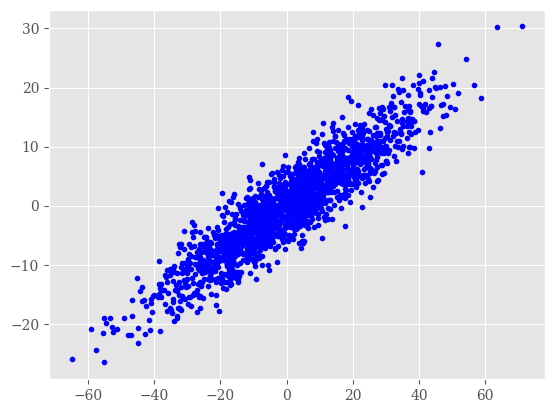

In [53]:
Towar_max = np.max(sma)
Towar_min = np.min(sma)
Towar_avg = np.mean(sma)

Towar_stock = (Towar_avg,np.array((Towar_max,Towar_min)))
Towar_bond = (Towar_avg,np.array((end,start)))

print('stock',Towar_stock, 'bond', Towar_bond)


M = np.array((Towar_bond[1],Towar_stock[1])).T  # macierz z wypłat odsetek i akcji
print(M)
K= np.min(cena_ważona['Cena']) # opcja wypłat
C1= np.maximum(Towar_stock[1]-K,0)

phi=  np.linalg.solve(M,C1) # opltymalne pozycje portfela

print(K,C1,phi)

#Arbitrage Pricing - ceny arbitażowe - jest to strategia polegająca na dokonaniu kilku transakcji( zajęcia co najmniej dwóch pozycji), tak żeby bez ponoszenia ryzyka osiągnąć zysk.

C0 = np.dot(phi,(Towar_bond[0],Towar_stock[0]))
print(C0)

#Symulacja 

np.random.seed(100)
n=2000
b =np.random.standard_normal(n)
s=np.random.standard_normal(n)
def portfolio(b,s):
    A=[b[i]*Towar_bond[1]+s[i]*Towar_stock[1] for i in range(n)]
    return np.array(A)

Rynek = portfolio(b,s)

plt.figure()
plt.plot(Rynek[:,0],Rynek[:,1],'b.')



### Kompletność rynków dla 3 stanów

[[-19.98397 -16.30857 -12.17147]
 [ -4.28972  -1.64094   0.12554]
 [ 18.55716  13.92255   9.50385]]


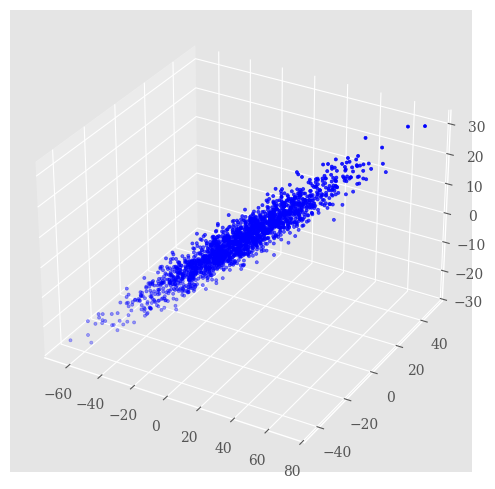

In [54]:
from pylab import mpl 
from mpl_toolkits.mplot3d import Axes3D


Towar_stock_3dim = (Towar_avg,np.array((Towar_max,Towar_avg,Towar_min)))
Towar_bond_3dim = (Towar_avg,np.array((end,Towar_avg,start)))



np.set_printoptions(precision=5)
np.random.seed(100)

n=2000

b3= np.random.standard_normal(n)
s3=np.random.standard_normal(n)
A3= [b3[i] *Towar_bond_3dim[1] + s3[i] * Towar_stock_3dim[1] for i in range(n)] 
A3 = np.array(A3)
print(A3[:3])



plt.style.use(style='ggplot')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'


fig = plt.figure(figsize=(10, 6))  
ax = fig.add_subplot(1,1,1, projection='3d')  
ax.scatter(A3[:, 0], A3[:, 1], A3[:, 2], c='b', marker='.')